In [1]:
import pandas as pd
import sqlite3

In [3]:
conn = sqlite3.connect("factbook.db")
q1= "select * from facts limit 5"
pd.read_sql_query(q1, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [6]:
q2 = "select max(population), min(population), max(population_growth), min(population_growth) from facts"
pd.read_sql_query(q2,conn)

,max(population),min(population),max(population_growth),min(population_growth)
0,7256490011,0,4.02,0.0


In [10]:
q3 = """select * from facts 
        where population == 0 or population == 7256490011"""
pd.read_sql_query(q3,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000.0,None,0,NaN,NaN,NaN,None
1,261,xx,World,None,NaN,None,7256490011,1.08,18.6,7.8,None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A39B04F98>,
      dtype=object)

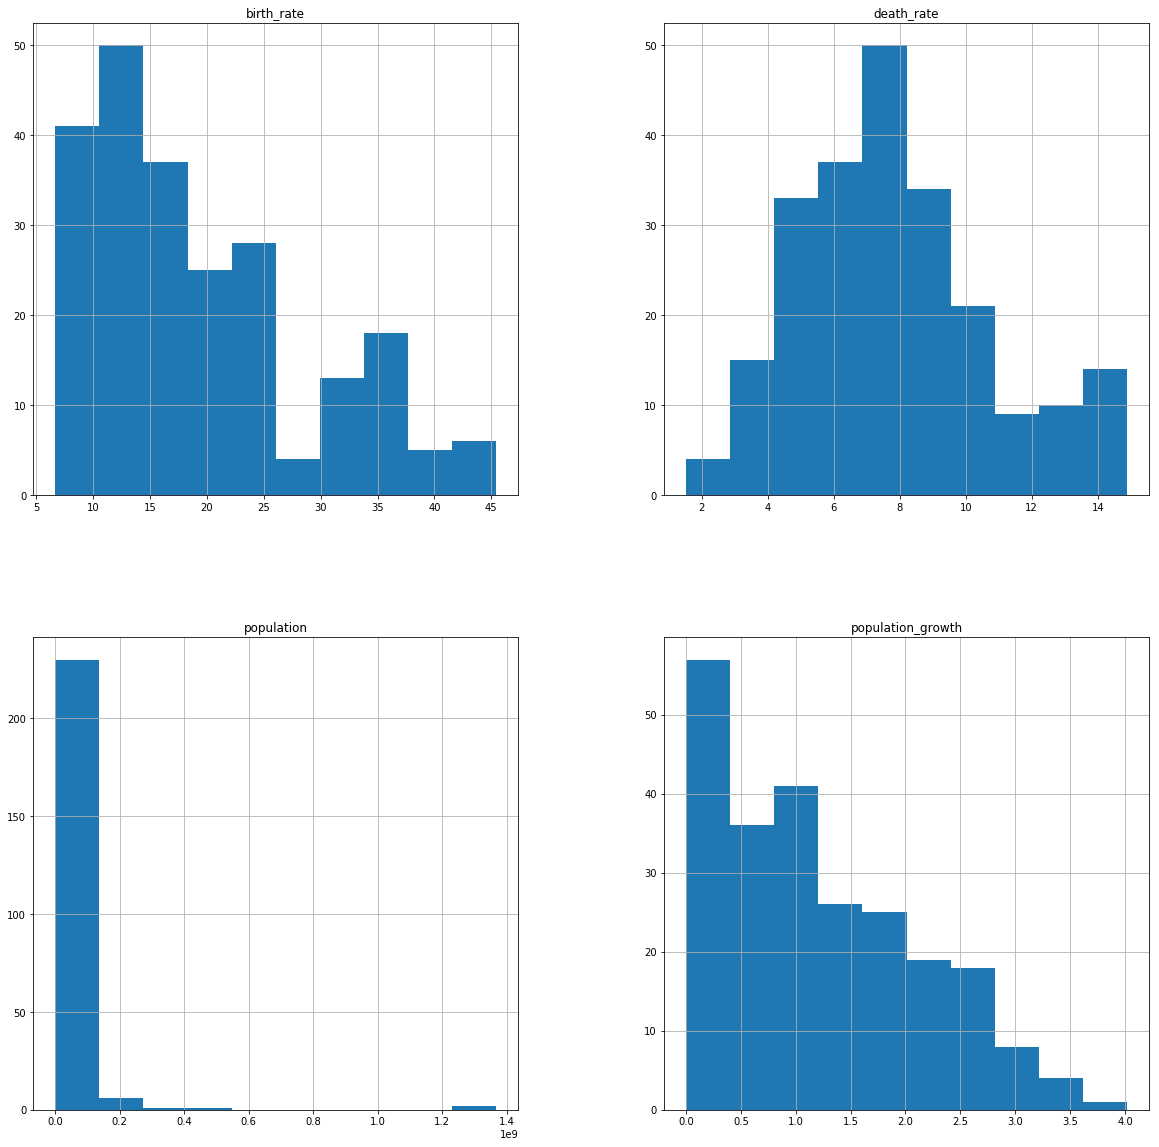

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

q4 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q4,conn).hist(figsize=(20,20))